In [2]:
import pickle

import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
import sklearn
from sklearn import linear_model
import torch

import os
os.chdir('..')

from cvae.vae import VAE
from envs.panda_center_out import PandaCenterOutEnv

In [3]:
with open('data/demonstration_real_center_out.pkl', 'rb') as fp:
    episodes = pickle.load(fp)

In [4]:
def visualize_encoder(decoder):
    actions_joints_test = np.array([step for epi in episodes['j_vel'] for step in epi]) 
    actions_joints_test = actions_joints_test.reshape(actions_joints_test.shape[0], -1)

    x = decoder.encoder(torch.tensor(actions_joints_test, dtype=torch.float))
    mu = decoder.fc_mu(x).detach().numpy()
    log_var = decoder.fc_var(x)
    std = torch.exp(log_var / 2).detach().numpy()

    std_x = std.copy()
    std_x[:, 1] = 0
    std_y = std.copy()
    std_y[:, 0] = 0

    horizontal_lines = list(zip(mu-std_x, mu+std_x))
    vertical_lines = list(zip(mu-std_y, mu+std_y))

    hlc = mc.LineCollection(horizontal_lines, linewidths=0.01)
    vlc = mc.LineCollection(vertical_lines, linewidths=0.01)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.add_collection(hlc)
    ax.add_collection(vlc)
    ax.autoscale()
    ax.margins(0.1)
    ax.scatter(mu[:, 0], mu[:, 1])
    ax.set_title('mean and variance of encoder')
    
    plt.show()

In [5]:
def get_latent_bounds(decoder):
    actions_joints_test = np.array([step for epi in episodes['j_vel'] for step in epi])
    actions_joints_test = actions_joints_test.reshape(actions_joints_test.shape[0], -1)

    x = decoder.encoder(torch.tensor(actions_joints_test, dtype=torch.float))
    mu = decoder.fc_mu(x).detach().numpy()
    log_var = decoder.fc_var(x)
    std = torch.exp(log_var / 2).detach().numpy()

    return {
        'x_min': min((mu - std)[:, 0]), 
        'x_max': max((mu + std)[:, 0]), 
        'y_min': min((mu - std)[:, 1]), 
        'y_max': max((mu + std)[:, 1])}

In [6]:
def visualize_decoder(decoder, x_min, x_max, y_min, y_max):
    x, y = np.meshgrid(
        np.arange(x_min, x_max, (x_max - x_min) / 20), 
        np.arange(y_min, y_max, (y_max - y_min) / 20))
    latents = torch.tensor(list(zip(x.reshape(-1), y.reshape(-1))), dtype=torch.float)

    fig = plt.figure(figsize=(20, 7))
    actions_joints = decoder(latent=latents, context=None).detach().numpy()
    plt.imshow(np.concatenate([actions_joints[:, i].reshape(20, 20) for i in range(7)], axis=1))

## cerulean-firebrand-431

In [26]:
decoder = VAE.load_from_checkpoint('latent-action/3nx02de8/checkpoints/epoch=399-step=43199.ckpt')

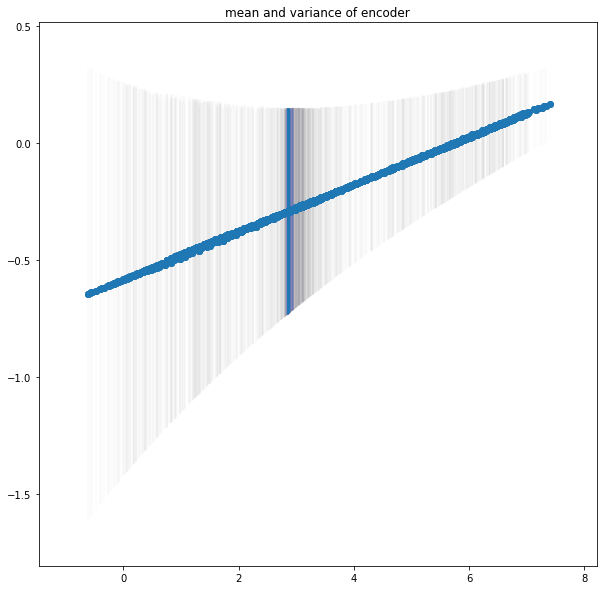

In [27]:
visualize_encoder(decoder)

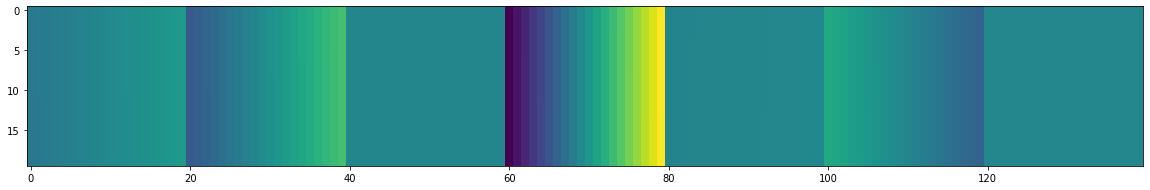

In [30]:
latent_bounds = get_latent_bounds(decoder)
visualize_decoder(decoder, **latent_bounds)

## upbeat-sun-432

In [7]:
decoder = VAE.load_from_checkpoint('latent-action/5i4q7t8f/checkpoints/epoch=399-step=43199.ckpt')

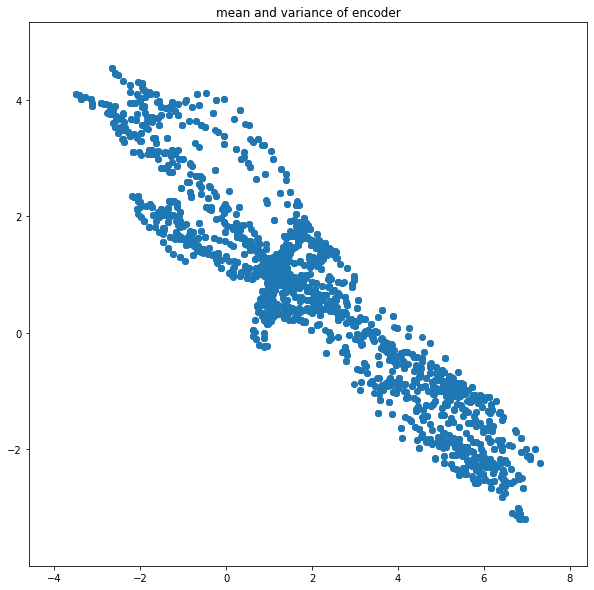

In [8]:
visualize_encoder(decoder)

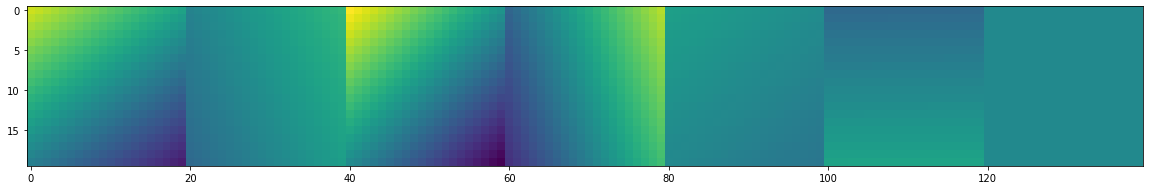

In [9]:
latent_bounds = get_latent_bounds(decoder)
visualize_decoder(decoder, **latent_bounds)